In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import seaborn as sns

In [2]:
cafe = pd.read_csv('./total_cafe.csv', encoding='EUC-KR')
cafe

,Unnamed: 0,lat,long,type
0,1,37.483440,127.012122,cafe
1,2,37.504214,127.002794,cafe
2,3,37.503478,126.992213,cafe
3,4,37.492203,127.013197,cafe
4,5,37.505472,126.994696,cafe
...,...,...,...,...
963,964,37.482999,127.035000,cafe
964,965,37.504944,127.004896,cafe
965,966,37.504944,127.004896,cafe
966,967,37.490696,127.005209,cafe


# DBSCAN

In [4]:
#표준화(평균=0, 분산=1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(cafe[["lat", "long"]])
scaled_X = scale.transform(cafe[["lat", "long"]])

cafe["scaled_lat"] = scaled_X[:,0]
cafe["scaled_long"] = scaled_X[:,1]

In [71]:
# DBSCAN 
# eps: 이웃을 정의하기 위한 거리. epsilon.
# min_samples: 핵심 데이터를 정의하기 위해 필요한 이웃영역안의 데이터 갯수.
dbscan = DBSCAN(eps=0.3, min_samples=30)
clust_db = dbscan.fit_predict(scaled_X)
cafe['clust_db'] = clust_db

Text(0, 0.5, 'long')

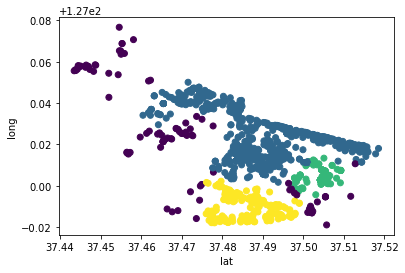

In [72]:
#clustering 결과 확인
plt.scatter(x=cafe.lat, y=cafe.long, c=cafe.clust_db)
plt.xlabel("lat")
plt.ylabel("long")

In [73]:
cafe

,Unnamed: 0,lat,long,type,scaled_lat,scaled_long,clust_db
0,1,37.483440,127.012122,cafe,-0.335621,-0.194197,0
1,2,37.504214,127.002794,cafe,1.119012,-0.699974,1
2,3,37.503478,126.992213,cafe,1.067494,-1.273725,-1
3,4,37.492203,127.013197,cafe,0.278017,-0.135913,0
4,5,37.505472,126.994696,cafe,1.207095,-1.139069,-1
...,...,...,...,...,...,...,...
963,964,37.482999,127.035000,cafe,-0.366509,1.046319,0
964,965,37.504944,127.004896,cafe,1.170157,-0.585998,1
965,966,37.504944,127.004896,cafe,1.170157,-0.585998,1
966,967,37.490696,127.005209,cafe,0.172462,-0.569026,0


In [74]:
cafe.groupby(clust_db).count()

,Unnamed: 0,lat,long,type,scaled_lat,scaled_long,clust_db
-1,100,100,100,100,100,100,100
0,589,589,589,589,589,589,589
1,103,103,103,103,103,103,103
2,176,176,176,176,176,176,176


# KMEANS

In [75]:
cafe_loc = cafe[['lat', 'long']]
data_points = cafe_loc.values

/Users/briley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/briley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/briley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/briley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/briley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/briley/opt/anaconda3/lib/python3.8/site-packages/matp

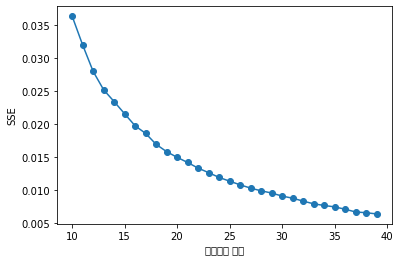

In [116]:
# 적당한 K값 찾기
def elbow(X):
    sse = []
    for i in range(10,40):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(10,40), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    
elbow(cafe_loc)

In [113]:
# Kmeans Clustering 20개로 군집화
kmeans = KMeans(n_clusters=20).fit(data_points)

In [117]:
# 20개로 군집화된 결과(라벨)를 데이터 프레임에 열로 추가
cafe['clust_km'] = kmeans.labels_

Text(0.5, 1.0, 'kmeans plot ver2')

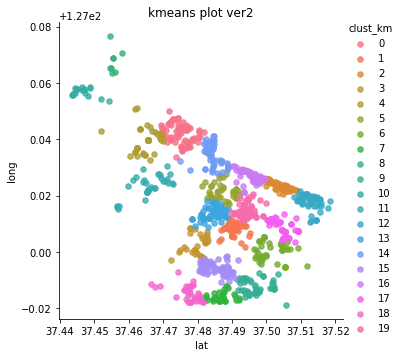

In [118]:
# Data point 시각화
sns.lmplot('lat', 'long', data=cafe, fit_reg = False,
          scatter_kws={"s":30}
          ,hue = "clust_km")
plt.title('kmeans plot ver2')

In [119]:
cafe

,Unnamed: 0,lat,long,type,scaled_lat,scaled_long,clust_db,clust_km
0,1,37.483440,127.012122,cafe,-0.335621,-0.194197,0,13
1,2,37.504214,127.002794,cafe,1.119012,-0.699974,1,6
2,3,37.503478,126.992213,cafe,1.067494,-1.273725,-1,9
3,4,37.492203,127.013197,cafe,0.278017,-0.135913,0,19
4,5,37.505472,126.994696,cafe,1.207095,-1.139069,-1,6
...,...,...,...,...,...,...,...,...
963,964,37.482999,127.035000,cafe,-0.366509,1.046319,0,14
964,965,37.504944,127.004896,cafe,1.170157,-0.585998,1,17
965,966,37.504944,127.004896,cafe,1.170157,-0.585998,1,17
966,967,37.490696,127.005209,cafe,0.172462,-0.569026,0,1


# 결론
### DBSCAN
- DBSCAN으로 군집화할 경우 밀집 정도에 따라 군집화를 시행할 수 있어요.
- 근데 dbscan은 밀도 기반이기때문에 centroid는 없습니다.
- 최적화된 서리풀컵의 위치를 알아내기에 DBSCAN은 적합하지 않은 듯 함.

### K-MEANS
- KMeans로 군집화 햇을 경우, 위치만 가까운 곳끼리 군집화가 됩니다. 
- 위치 기반으로 중심지가 어딘지 보려면 K-means로 centroid 표시 가능.
- 다음 단계 : 센트로이드 나타내고 그 센트로이드를 지도로 옮겨서 서리풀컵의 위치 비교해보기.